# Gaussian Mixture Models:

- A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. 
- It attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset allowing the model to learn automatically, i.e. in an unsupervised manner. 
- The bag-of-words model is a way of representing text data when modelling text with machine learning algorithms which can be combined with GMM to get a useful model representation.

In [1]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using a gaussian mixture model, perform a simple clustering on the given 2D Dataset. Try to find the optimal number of clusters using python

Dataset : https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/Clustering_gmm.csv

In [64]:
df = pd.read_csv("Clustering_gmm.csv")
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [65]:
X = df.values

##### Finding the optimium number of CLusters Using the "Within Cluster Sum of Squares" (WCSS) and "Elbow" Method

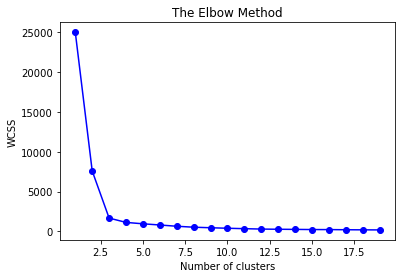

In [53]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,20):
    model = KMeans(n_clusters = i)
    model.fit(X)
    wcss.append(model.inertia_)

plt.plot(range(1,20), wcss, marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Looking at where the ELBOW starts in the plot we can see that the Best **Cluster Number** would be **3**

In [61]:
gmm = GMM(n_components = 4, verbose = 1, n_init=5)
gmm.fit(X)

Initialization 0
Initialization converged: True
Initialization 1
Initialization converged: True
Initialization 2
Initialization converged: True
Initialization 3
Initialization converged: True
Initialization 4
Initialization converged: True


GaussianMixture(n_components=4, n_init=5, verbose=1)

In [62]:
gmm.means_

array([[ 2.39577432,  1.18444784],
       [-1.59334377,  2.82106196],
       [ 0.94024787,  4.3179012 ],
       [ 1.62801055,  0.65653159]])

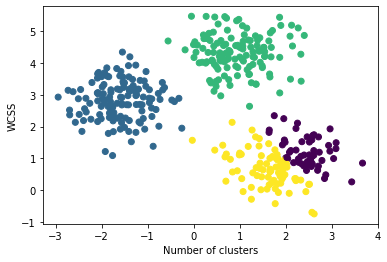

In [63]:
labels = gmm.predict(X)


plt.scatter(X[:,0], X[:,1],c =labels, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
# X = X[:, ::-1] # flip axes for better plotting

In [58]:
from matplotlib.patches import Ellipse

def draw_ellipse(position,covariance,**kwargs):
    ax = plt.gca()
    if covariance.shape == (2,2):
        U,s,Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0],U[0,0]))
        width,height = 2* np.sqrt(s)
    else:
        angle =0 
        width,height = 2*np.sqrt(covariance)
        
    for n in range(1,4):
        ax.add_patch(Ellipse(position,n*width,n*height,angle, **kwargs))

In [59]:
def plot_gmm(gmm, X, label=True):
    ax = plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

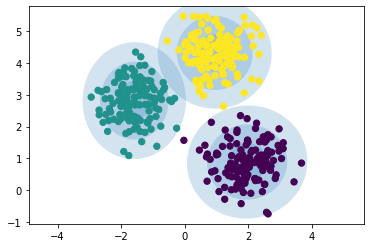

In [60]:
gmm = GMM(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X)

In [12]:
###############################################

In [13]:
X.shape, y_true.shape

((400, 2), (400,))

### GMM Implementation from Scratch

In [14]:
def gauss(x, m, v):
    x = np.array(x)
    m = np.array(m)
    v = np.array(v)
    
    numerator = np.exp(-0.5*np.square((x-m)/v))
    denominator = np.sqrt(2*np.pi*v)
    result = numerator/denominator
    return np.array(result)

In [15]:
def GMM_mean_var_update(X, om, ov,max_iter, thresh):
    for iter_no in range(max_iter+1):
        new_mean_list = []
        new_var_list = []

        for i in range(3):
            nm_num= np.zeros(2)
            nm_den= np.zeros(2)
            nv_num = np.zeros(2)
            nv_den = np.zeros(2)

            for j in range(len(X)):
#                 print(iter_no, i, j)
                nm_num += (X[j]*gauss(X[j], om[i], ov[i]))
                nm_den += gauss(X[j], om[i], ov[i])

                nv_num += (np.square(X[j]-om[i])*gauss(X[j], om[i], ov[i]))
                nv_den += gauss(X[j], om[i], ov[i])

            new_mean_list.append(nm_num/nm_den)
            new_var_list.append(nv_num/nv_den)
        if iter_no == max_iter:
            print(f"Iter number : {iter_no}")
            print(f"Max Iters reached : {max_iter}")
            return new_mean_list, new_var_list
        if abs(np.array(new_mean_list)-np.array(om)).sum() <thresh:
            print(f"Iter number : {iter_no}")
            return new_mean_list, new_var_list
        else:
            om = new_mean_list
            ov = new_var_list
            print(f"Iter number : {iter_no}")
            continue

In [16]:
# Initializing for GMM
model = KMeans(n_clusters = 3)

# Compute clustering and transform X to cluster-distance space
dist = model.fit_transform(X)

In [17]:
labels = model.labels_
labels.shape

(400,)

In [18]:
cluster_list = [[], [], []]
for i in range(len(X)):
    if labels[i] == 0:
        cluster_list[0].append(X[i])
        continue
    if labels[i] == 1:
        cluster_list[1].append(X[i])
        continue
    if labels[i] == 2:
        cluster_list[2].append(X[i])
        continue

In [41]:
cluster_mean = []
cluster_var = []
for i in cluster_list:
    cluster_mean.append(np.mean(i, axis = 0))
    cluster_var.append(np.var(i, axis = 0))   

In [20]:
cluster_mean, cluster_var

([array([1.97280034, 0.8791194 ]),
  array([-1.58281747,  2.8130273 ]),
  array([0.94252276, 4.31972696])],
 [array([0.38336828, 0.34541846]),
  array([0.30257839, 0.37957523]),
  array([0.35430416, 0.34185072])])

In [42]:
# GMM_mean_var_update(X, om, ov, max_iter, thresh)
new_mean , new_var = GMM_mean_var_update(X, cluster_mean, cluster_var, 5, .01)

Iter number : 0
Iter number : 1
Iter number : 2
Iter number : 3


Updated Mean & Var

In [43]:
new_mean , new_var

([array([1.8898652 , 0.89992619]),
  array([-1.58113322,  2.87760177]),
  array([0.98257009, 4.31427482])],
 [array([7.94271064e-06, 6.89153500e-08]),
  array([7.92807082e-08, 1.59301486e-09]),
  array([6.32676113e-06, 5.83656401e-06])])